In [2]:
import numpy as np
import matplotlib.pyplot as plt
import corner

In [ ]:
#Here is where we run the boost factor test file using cosmosis. 
#! cosmosis boost_factor_test.ini
! cosmosis boost_factor_test.ini >& jack &

In [22]:
#R=np.linspace(0.1,1,10)
R = np.logspace(-1,2,100); # print(*R, sep=" ")
#R=p.logspace(0,1.5,2)
B0 = 100
B= Boost_Factor_Model(R, 1, B0)


/tmp/ipykernel_150154/3990801223.py:11: RuntimeWarning: invalid value encountered in true_divide
  B= 1+B0*((1-fx)/(x**2-1))


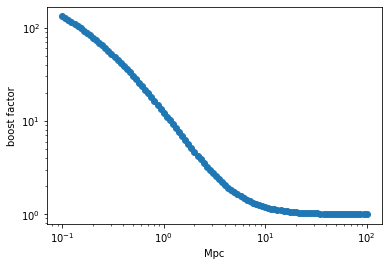

In [29]:
plt.scatter(R,B);plt.xlabel("Mpc"); plt.ylabel('boost factor')
plt.yscale('log');plt.xscale('log')


In [32]:
variance = np.ones(B.size)*0.1**2
sigma_B =B*np.random.normal(loc=0, scale=variance**(1/2), size=B.size) #results in log noise
#data = B+error
#log_model = np.log10(B)
#log_data = log_model + error/B
data = B +sigma_B
#=np.random.normal(loc=B, scale=variance**(1/2), size=B.size)
#we did this because of error propegation of log so we can get gaussian 
#B = np.log10(B)
#data = np.log10(data)
chi_sq = ((B)-(data))**2/sigma_B**2
print(chi_sq.sum()/(B.size -1))


9.090909090909092


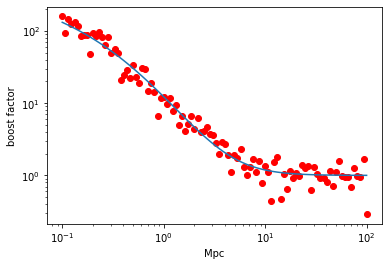

In [35]:
plt.plot(R,B);plt.xlabel("Mpc"); plt.ylabel('boost factor')
plt.scatter(R,data, c ='r')
plt.yscale('log');plt.xscale('log')
#plt.xlim(0.1,2);plt.ylim(0.01,0.4)

In [77]:
! pwd

/global/u1/e/eabdelaz/cluster_2022


In [42]:
rs,b0,prior,post = np.genfromtxt("boost_factor_emcee.txt", unpack=True)


[1.00000e+00 2.00000e+00 3.00000e+00 ... 3.19998e+05 3.19999e+05
 3.20000e+05]


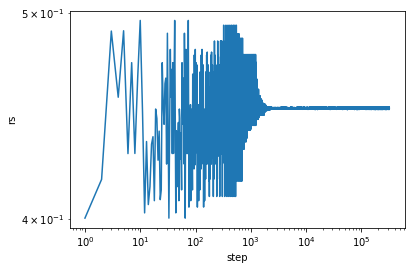

In [56]:
step = np.linspace(1, b0.size, b0.size)
plt.loglog(step,rs);plt.xlabel("step"); plt.ylabel('rs')
plt.show()
#plt.scatter(R,data, c ='r')
#plt.yscale('log');plt.xscale('log')

In [4]:
#new code
def lookup_table(a,b):
    bins = dict()
    bin_a = 0
    for A in a:
        bin_b = 0
        for B in b:
            bins[A,B] = bin_a, bin_b
            bin_b +=1
        bin_a +=1
    return bins

In [6]:
z = np.array([0.25,0.57,0.78]) ; l = np.array([25,50,70,160])
v = lookup_table(l,z);v[25,0.25]

(0, 0)

In [3]:
print("{:s}".format(str([10,11])[1:-1].replace(", ","")))
str([10,11])[1:-1].replace(", ","")


1011


'1011'

$\Large \text{The chain and its graphical analysis are below} $

In [3]:
samples= np.genfromtxt("boost_factor_emcee.txt"); 
samples = samples[:,:-2]; 
params = np.genfromtxt("boost_factor_emcee.txt", max_rows=1, comments = "%" ,dtype=str);
samples.shape

(3200000, 2)

Boost_Factor_Model_Values--b0


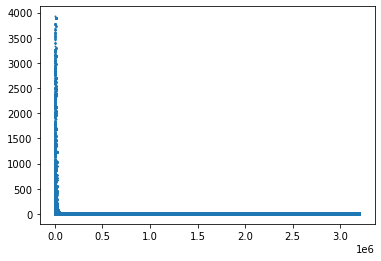

In [4]:
column = 1; print(params[column]);
plt.scatter(np.arange(samples[:,column].size),samples[:,column], s =1);

18.836072584029505
6.439875154304999
0.020418835498471916


(None, None)

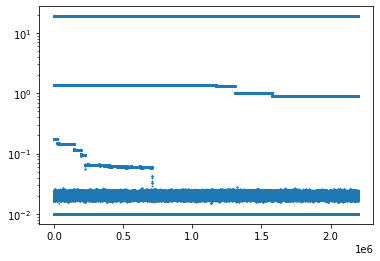

In [10]:
min = 1000000
plt.scatter(np.arange(samples[min:,column].size),samples[min:,column], s =1);
plt.yscale("log")
print(samples[min:,column].max())
print(np.median(samples[min:,0])),print(np.median(samples[min:,1]))
#plt.plot([15000,15000],[10^(-1),100], c = "r")

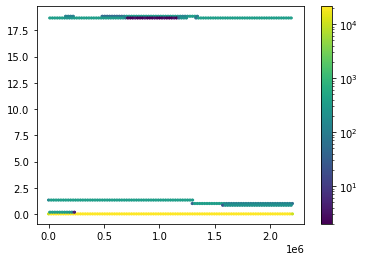

In [11]:
plt.hexbin(np.arange(samples[min:,column].size),samples[min:,column], bins = "log");
plt.colorbar()

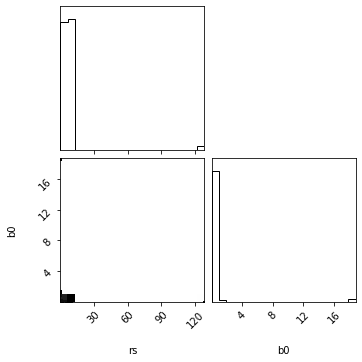

In [12]:
labels = list()
for p in params[:-2]:
    p = p[27:]
    labels.append(p)
labels[0]=labels[0][1:]

figure = corner.corner(samples[min:,:],labels=labels)

In [45]:
z =(0.2+0.35)/2 ; l = 7.5
from scipy import interpolate
import Boost_factor_util
import importlib
importlib.reload(Boost_factor_util)

def model_new(Z,L,Rs,alpha_Rs,beta_Rs,B0,alpha_B0,beta_B0):
    R = np.logspace(-4,2,100)
    rs,b0 = Boost_factor_util.Boost_Factor_param(Z,L,Rs,alpha_Rs,beta_Rs,B0,alpha_B0,beta_B0)
    B=Boost_factor_util.Boost_Factor_Model(R, rs, b0)
    B_interp= interpolate.interp1d(R, B)
    return B_interp


In [46]:
if 1 == 1:
    rs = np.median(samples[min:,0])
    b0 = np.median(samples[min:,1])
    Rs_alpha = 1
    B0_alpha = 1
    Rs_beta = 1
    B0_beta = 1
 #   Rs_alpha = np.median(samples[min:,2])
 #   B0_alpha = np.median(samples[min:,3])
  #  Rs_beta = np.median(samples[min:,4])
   # B0_beta = np.median(samples[min:,5])
else: 
    rs = 0.7
    b0 = 3
    Rs_alpha = 1
    B0_alpha = 1
    Rs_beta = 1
    B0_beta = 1
#    rs = np.median(samples[min:,0])
#    b0 = np.median(samples[min:,1])
print("rs =", rs, "B0 = ", b0)
B =model_new(z,l,rs,Rs_alpha,Rs_beta,b0,B0_alpha,B0_beta)



rs = 1.6676057907187871 B0 =  0.9777852964014562


[0.70449318 0.49329469 0.08006515 0.1288663  0.06913427 0.9742281
 4.62057845 1.77503646 0.01490554]
Log_like =  -4.430301074913231 
reduced_chisq =  1.1075752687283078


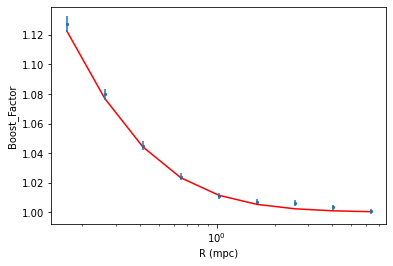

In [47]:
pick_l = 0
pick_z = 0
R,data_vector,sigma_B = np.genfromtxt("/global/homes/e/eabdelaz/cluster_2022/profiles/full-unblind-v2-mcal-zmix_y1clust_l{l}_z{z}_zpdf_boost.dat".format(l = pick_l, z = pick_z),unpack=True)
#print(R.size,data_vector.size,sigma_B)
ix,=np.where(R < 8)
R= R[ix]; data_vector = data_vector[ix]; sigma_B = sigma_B[ix]
plt.scatter(R,data_vector, s =5)
plt.plot(R,B(R), c ="r")
plt.errorbar(R,data_vector,yerr=sigma_B,ls ="None")
plt.xscale("log");#plt.yscale("log")
plt.xlabel("R (mpc)"); plt.ylabel("Boost_Factor")
diff = B(R)-data_vector
chisq = (diff/sigma_B)**2;print(chisq)
chisqsum = chisq.sum()
log_P = (-chisqsum/2)
#print("data = ", data_vector)
#print("error = ", sigma_B)
#print("chisq = ", chisq)
print("Log_like = ",log_P,"\nreduced_chisq = ", chisqsum/(chisq.size -1))


In [12]:
samples.shape

(6400, 6)

In [9]:
type(samples)

numpy.ndarray

In [532]:
R,data_vector,sigma_B = np.genfromtxt("/global/homes/e/eabdelaz/cluster_2022/profiles/full-unblind-v2-mcal-zmix_y1clust_l{l}_z{z}_zpdf_boost.dat".format(l = 0, z = 0),unpack=True)
covariance = np.genfromtxt("/global/homes/e/eabdelaz/cluster_2022/profiles/full-unblind-v2-mcal-zmix_y1clust_l{l}_z{z}_zpdf_boost_cov.dat".format(l = 0, z = 0),unpack=True) 
print(covariance,covariance.shape)
ix,=np.where(R < 8)
covariance = covariance[ix[0]:ix[-1]+1,ix[0]:ix[-1]+1]
print(covariance,covariance.shape)

[[2.78095131e-05 1.59289055e-05 1.11832519e-05 7.98806836e-06
  6.41625385e-06 5.10758078e-06 5.34420704e-06 4.56588026e-06
  3.97394877e-06 2.06689778e-36 3.67683371e-29]
 [1.59289055e-05 1.50560529e-05 9.42953686e-06 7.25017801e-06
  5.79272567e-06 4.91785999e-06 4.90988573e-06 4.26681917e-06
  3.96567961e-06 1.04719868e-36 1.88373673e-29]
 [1.11832519e-05 9.42953686e-06 8.39896558e-06 6.14149166e-06
  5.14529254e-06 4.35490734e-06 4.30310073e-06 4.00159222e-06
  3.79702604e-06 6.15732377e-37 2.81556475e-29]
 [7.98806836e-06 7.25017801e-06 6.14149166e-06 5.72964548e-06
  4.56248322e-06 3.81719987e-06 3.78708253e-06 3.45090340e-06
  3.33328385e-06 9.10976307e-37 1.45902653e-29]
 [6.41625385e-06 5.79272567e-06 5.14529254e-06 4.56248322e-06
  4.41420391e-06 3.64037079e-06 3.56781859e-06 3.30497785e-06
  3.20259134e-06 1.09074841e-36 1.94135868e-29]
 [5.10758078e-06 4.91785999e-06 4.35490734e-06 3.81719987e-06
  3.64037079e-06 3.61236994e-06 3.37137701e-06 3.18578420e-06
  3.06185225e-06